In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')
en_stops = set(stopwords.words('english'))

In [ ]:
#Add stopword
#en_stops.extend(["."])

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
scopus = pd.read_csv('/content/drive/MyDrive/workshop/scopusB-swu-stop-lem (1).csv', encoding = "ISO-8859-1")
#df2 = scopus[["TitleWithLemma","Author Keywords","AbstractWithLemma"]] 

# Using loc[] to take column slices
df2 = scopus.loc[:, ["TitleWithLemma","Author Keywords","AbstractWithLemma"]]
df2
scopus

,Title,Abstract,Author Keywords,Title_WithoutStop,Abstract_WithoutStop,TitleWithLemma,AbstractWithLemma
0,Denoising of electrocardiogram measurement sys...,Electrocardiogram(ECG) signal is the most impo...,Denoising; Electrocardiogram(ECG); Independent...,Denoising electrocardiogram measurement system...,Electrocardiogram(ECG) signal important medica...,Denoising electrocardiogram measurement system...,Electrocardiogram(ECG) signal important medica...
1,SwingPong: Analysis and suggestion based on mo...,Table tennis is a sport that everyone can play...,Accelerometer; Decision_tree; Feedback; Gyrosc...,SwingPong: Analysis suggestion based motion da...,"Table tennis sport everyone play, regardless a...",SwingPong: Analysis suggestion base motion dat...,"Table tennis sport everyone play, regardless a..."
2,A dynamic channel allocation algorithm based o...,The vertical handover decision algorithm plays...,Back_propagation_neural_network; Channel_alloc...,dynamic channel allocation algorithm based bac...,vertical handover decision algorithm plays imp...,dynamic channel allocation algorithm base back...,vertical handover decision algorithm play impo...
3,Synthesis of PANI/hematite/PB hybrid nanocompo...,"In this work, the composites of polyaniline/na...",NaN,Synthesis PANI/hematite/PB hybrid nanocomposit...,"In work, composites polyaniline/nano-hematite ...",Synthesis PANI/hematite/PB hybrid nanocomposit...,"In work, composite polyaniline/nano-hematite (..."
4,The political dynamics of social security poli...,The policy aiming to provide the basic needs f...,Capital_role_of_the_state; Social_security_pol...,political dynamics social security policy Thai...,policy aiming provide basic needs private work...,political dynamic social security policy Thail...,policy aim provide basic need private worker r...
...,...,...,...,...,...,...,...
2698,Thai tourist commitment and loyalty to travel ...,The purpose of this research is to study facto...,Commitment; Loyalty; Thai_tourist; Travel_by_sea,Thai tourist commitment loyalty travel sea,purpose research study factors influencing Tha...,Thai tourist commitment loyalty travel sea,purpose research study factor influence Thai t...
2699,Serum sodium levels do not predict recurrence ...,Background: Febrile seizures recur within 24 h...,Febrile_seizures; Recurrent_febrile_seizures; ...,Serum sodium levels predict recurrence febrile...,Background: Febrile seizures recur within 24 h...,Serum sodium level predict recurrence febrile ...,Background: Febrile seizure recur within 24 ho...
2700,Turbulent two phase approach model for the nan...,This study presents the numerical simulation o...,Convective_heat_transfer; Minichannel_heat_sin...,Turbulent two phase approach model nanofluids ...,study presents numerical simulation turbulent ...,Turbulent two phase approach model nanofluids ...,study present numerical simulation turbulent h...
2701,Tandem measurements of iron and creatinine by ...,This work presents development of a method for...,Creatinine; Cross_injection_analysis; Iron; Ta...,Tandem measurements iron creatinine cross inje...,work presents development method dual determin...,Tandem measurement iron creatinine cross injec...,work present development method dual determina...


In [ ]:
for col in scopus.columns:
    print(col)

Authors
Title
Year
Source title
DOI
Link
Affiliations
Authors with affiliations
Abstract
Author Keywords
Index Keywords
Publisher
Abbreviated Source Title
Document Type
institution
Cited by


In [ ]:
scopus['Abstract'][0]

Electrocardiogram(ECG) signal is the most important of medical information used to diagnosis and indicates the condition of the heart in humans. In a design and construction of single-lead electrocardiogram measurement system using discrete component incorporated with data acquisition(DAQ) was a problem from the noise or external interference. The modern technology in signals processing used to perform a noise canceling in electrocardiography. In this paper, we propose the simulation study of modern signal processing technique to separate the single channel of ECG signals from noise and others interference. The ECG signal was performed a denoising using ICA. A useful ICA algorithm called FAS-TICA is a highperformance algorithm to divide multiple linear combinations of ECG and noise to statistically independent elements. Our experimental results indicate the robustness of ICA after applied ECG is higher than before applied ICA, since the correlation coefficient and SNR is improved with minimum error. ? 2016 IEEE.

In [ ]:
scopus.rename( columns={'Unnamed: 0':'index'}, inplace=True )
scopus.rename( columns={'Author Keywords':'Author_Keywords'}, inplace=True )

In [ ]:
scopus.head(3)

,index,Title,Abstract,Author_Keywords
0,0,Denoising of electrocardiogram measurement sys...,Electrocardiogram(ECG) signal is the most impo...,Denoising; Electrocardiogram(ECG); Independent...
1,1,SwingPong: Analysis and suggestion based on mo...,Table tennis is a sport that everyone can play...,Accelerometer; Decision tree; Feedback; Gyrosc...
2,2,A dynamic channel allocation algorithm based o...,The vertical handover decision algorithm plays...,Back propagation neural network; Channel alloc...


In [ ]:
scopus.isnull().any()

index              False
Title              False
Abstract           False
Author_Keywords     True
dtype: bool

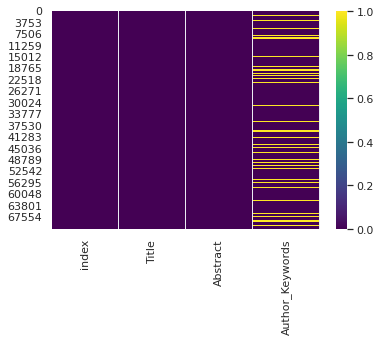

In [ ]:
sns.heatmap(scopus.isnull(), cmap='viridis')

In [7]:
df2['Author Keywords'].fillna(' ', inplace=True)
df2

,TitleWithLemma,Author Keywords,AbstractWithLemma
0,Denoising electrocardiogram measurement system...,Denoising; Electrocardiogram(ECG); Independent...,Electrocardiogram(ECG) signal important medica...
1,SwingPong: Analysis suggestion base motion dat...,Accelerometer; Decision_tree; Feedback; Gyrosc...,"Table tennis sport everyone play, regardless a..."
2,dynamic channel allocation algorithm base back...,Back_propagation_neural_network; Channel_alloc...,vertical handover decision algorithm play impo...
3,Synthesis PANI/hematite/PB hybrid nanocomposit...,,"In work, composite polyaniline/nano-hematite (..."
4,political dynamic social security policy Thail...,Capital_role_of_the_state; Social_security_pol...,policy aim provide basic need private worker r...
...,...,...,...
2698,Thai tourist commitment loyalty travel sea,Commitment; Loyalty; Thai_tourist; Travel_by_sea,purpose research study factor influence Thai t...
2699,Serum sodium level predict recurrence febrile ...,Febrile_seizures; Recurrent_febrile_seizures; ...,Background: Febrile seizure recur within 24 ho...
2700,Turbulent two phase approach model nanofluids ...,Convective_heat_transfer; Minichannel_heat_sin...,study present numerical simulation turbulent h...
2701,Tandem measurement iron creatinine cross injec...,Creatinine; Cross_injection_analysis; Iron; Ta...,work present development method dual determina...


In [ ]:
scopus['Title'] = scopus['Title'].str.replace(' ', ';')
scopus['Abstract'] = scopus['Abstract'].str.replace(' ', ';')

In [ ]:
scopus['tags'] = scopus['Title'] + " " + scopus['Abstract'] + " " + scopus['Author_Keywords']

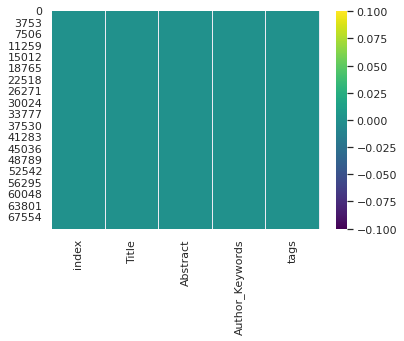

In [ ]:
sns.heatmap(scopus.isnull(), cmap='viridis')

In [ ]:
scopus['tags']

0        Denoising;of;electrocardiogram;measurement;sys...
1        SwingPong:;Analysis;and;suggestion;based;on;mo...
2        A;dynamic;channel;allocation;algorithm;based;o...
3        Synthesis;of;PANI/hematite/PB;hybrid;nanocompo...
4        The;political;dynamics;of;social;security;poli...
                               ...                        
71292    Modeling;improved;ISCO;treatment;of;low;permea...
71293    Improvement;of;thermal;stability;and;reduction...
71294    Characterization;of;proopiomelanocortin;in;the...
71295    Proposed;some;interactions;at;molecular;level;...
71296    N-coumarin;derivatives;as;hole-transporting;em...
Name: tags, Length: 71297, dtype: object

In [ ]:
scopus['tags'][0]

'Denoising;of;electrocardiogram;measurement;system;based;on;statistical;signal;processing Electrocardiogram(ECG);signal;is;the;most;important;of;medical;information;used;to;diagnosis;and;indicates;the;condition;of;the;heart;in;humans.;In;a;design;and;construction;of;single-lead;electrocardiogram;measurement;system;using;discrete;component;incorporated;with;data;acquisition(DAQ);was;a;problem;from;the;noise;or;external;interference.;The;modern;technology;in;signals;processing;used;to;perform;a;noise;canceling;in;electrocardiography.;In;this;paper,;we;propose;the;simulation;study;of;modern;signal;processing;technique;to;separate;the;single;channel;of;ECG;signals;from;noise;and;others;interference.;The;ECG;signal;was;performed;a;denoising;using;ICA.;A;useful;ICA;algorithm;called;FAS-TICA;is;a;highperformance;algorithm;to;divide;multiple;linear;combinations;of;ECG;and;noise;to;statistically;independent;elements.;Our;experimental;results;indicate;the;robustness;of;ICA;after;applied;ECG;is;h

In [ ]:
for col in scopus.columns:
    print(col)

Authors
Title
Year
Source title
DOI
Link
Affiliations
Authors with affiliations
Abstract
Author Keywords
Index Keywords
Publisher
Abbreviated Source Title
Document Type
institution
Cited by


In [ ]:
scopus_ws = scopus.head(1000)
scopus_ws.head(3)

,index,Title,Abstract,Author_Keywords,tags
0,0,Denoising;of;electrocardiogram;measurement;sys...,Electrocardiogram(ECG);signal;is;the;most;impo...,Denoising; Electrocardiogram(ECG); Independent...,Denoising;of;electrocardiogram;measurement;sys...
1,1,SwingPong:;Analysis;and;suggestion;based;on;mo...,Table;tennis;is;a;sport;that;everyone;can;play...,Accelerometer; Decision tree; Feedback; Gyrosc...,SwingPong:;Analysis;and;suggestion;based;on;mo...
2,2,A;dynamic;channel;allocation;algorithm;based;o...,The;vertical;handover;decision;algorithm;plays...,Back propagation neural network; Channel alloc...,A;dynamic;channel;allocation;algorithm;based;o...


In [ ]:
#sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english'
# max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
# max_df = 25 means "ignore terms that appear in more than 25 documents"
# min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
# min_df = 5 means "ignore terms that appear in less than 5 documents".

vectorizer = TfidfVectorizer(sublinear_tf= True, min_df = 0.2, norm='l2', ngram_range=(1, 2), stop_words=en_stops)
X_train_vc = vectorizer.fit_transform(scopus_ws['tags'])

pd.DataFrame(X_train_vc.toarray(), columns=vectorizer.get_feature_names())#.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,2016,2017,2018,also,analysis,based,data,found,high,method,...,respectively,results,rights,rights reserved,showed,study,thailand,two,used,using
0,0.349998,0.0,0.0,0.000000,0.336004,0.331092,0.348171,0.000000,0.0,0.000000,...,0.0,0.225236,0.000000,0.000000,0.000000,0.237745,0.000000,0.000000,0.494313,0.426800
1,0.282134,0.0,0.0,0.000000,0.458595,0.266894,0.589000,0.000000,0.0,0.000000,...,0.0,0.181563,0.000000,0.000000,0.000000,0.000000,0.000000,0.291926,0.235341,0.344044
2,0.448601,0.0,0.0,0.000000,0.000000,0.718518,0.446260,0.000000,0.0,0.000000,...,0.0,0.288690,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.271842,0.0,0.0,0.265372,0.000000,0.613654,0.000000,0.000000,0.0,0.456282,...,0.0,0.000000,0.000000,0.000000,0.468505,0.000000,0.000000,0.000000,0.226756,0.000000
4,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.687752,0.000000,0.000000,0.000000,0.725946,0.000000,0.000000,0.000000,0.000000
996,0.000000,0.0,0.0,0.000000,0.293921,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.315048,0.315048,0.000000,0.000000,0.785217,0.000000,0.000000,0.000000
997,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.326241,0.0,0.000000,...,0.0,0.200655,0.000000,0.000000,0.000000,0.000000,0.000000,0.841864,0.000000,0.380222
998,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.494962,...,0.0,0.544022,0.000000,0.000000,0.000000,0.574234,0.000000,0.000000,0.000000,0.359595


In [ ]:
k_clusters = 10

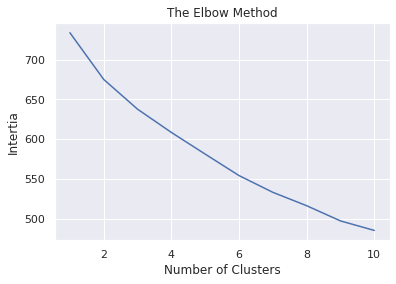

In [ ]:
from sklearn.cluster import KMeans

score = []
for i in range(1,k_clusters + 1):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=600,n_init=5,random_state=1234)
    kmeans.fit(X_train_vc)
    score.append(kmeans.inertia_)
    #score.append(kmeans.cluster_centers_)
#.inertia_ คือค่าผลรวมความคลาดเคลื่อนกำลังสอง (SSE) ของการแบ่งกลุ่ม

plt.plot(range(1,k_clusters + 1 ),score)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Intertia')
plt.show()

In [ ]:
# elbow method n
k_clusters = 6 
#random สุ่มเพื่อให้เป็นกลุ่มแน่นอน
#n_init อิง elbow method n
model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, random_state=1234)
model.fit(X_train_vc)

KMeans(max_iter=600, n_clusters=6, random_state=1234)

In [ ]:
clusters = model.predict(X_train_vc)

In [ ]:
scopus_ws["kmeans_group"] = clusters
scopus_ws.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,Title,Abstract,Author_Keywords,tags,kmeans_group
0,0,Denoising;of;electrocardiogram;measurement;sys...,Electrocardiogram(ECG);signal;is;the;most;impo...,Denoising; Electrocardiogram(ECG); Independent...,Denoising;of;electrocardiogram;measurement;sys...,1
1,1,SwingPong:;Analysis;and;suggestion;based;on;mo...,Table;tennis;is;a;sport;that;everyone;can;play...,Accelerometer; Decision tree; Feedback; Gyrosc...,SwingPong:;Analysis;and;suggestion;based;on;mo...,1
2,2,A;dynamic;channel;allocation;algorithm;based;o...,The;vertical;handover;decision;algorithm;plays...,Back propagation neural network; Channel alloc...,A;dynamic;channel;allocation;algorithm;based;o...,2


<Figure size 1152x720 with 0 Axes>

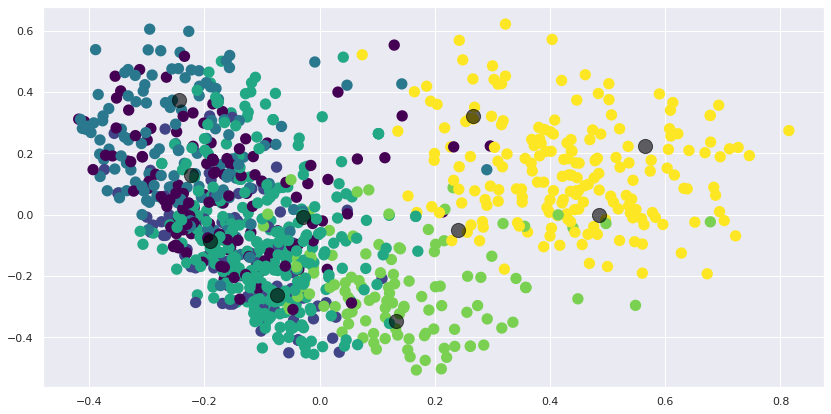

<Figure size 1152x720 with 0 Axes>

In [ ]:
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X_train_vc.toarray())
#kmeans = KMeans(n_clusters=k_clusters, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
#prediction = kmeans.predict(Y_sklearn)

plt.figure(figsize=(14, 7))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c = clusters, s=40, cmap='viridis', linewidths=5)

centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=200, alpha=0.6);
plt.figure(figsize=(16,10)) 

In [ ]:
scopus_df = pd.DataFrame(data=scopus_ws)
scopus_df.head()

,index,Title,Abstract,Author_Keywords,tags,kmeans_group
0,0,Denoising;of;electrocardiogram;measurement;sys...,Electrocardiogram(ECG);signal;is;the;most;impo...,Denoising; Electrocardiogram(ECG); Independent...,Denoising;of;electrocardiogram;measurement;sys...,1
1,1,SwingPong:;Analysis;and;suggestion;based;on;mo...,Table;tennis;is;a;sport;that;everyone;can;play...,Accelerometer; Decision tree; Feedback; Gyrosc...,SwingPong:;Analysis;and;suggestion;based;on;mo...,1
2,2,A;dynamic;channel;allocation;algorithm;based;o...,The;vertical;handover;decision;algorithm;plays...,Back propagation neural network; Channel alloc...,A;dynamic;channel;allocation;algorithm;based;o...,2
3,3,Synthesis;of;PANI/hematite/PB;hybrid;nanocompo...,"In;this;work,;the;composites;of;polyaniline/na...",,Synthesis;of;PANI/hematite/PB;hybrid;nanocompo...,2
4,4,The;political;dynamics;of;social;security;poli...,The;policy;aiming;to;provide;the;basic;needs;f...,Capital role of the state; Social security pol...,The;political;dynamics;of;social;security;poli...,4


In [ ]:
scopus_df[(scopus_df.kmeans_group == 1) ].count()

index              107
Title              107
Abstract           107
Author_Keywords    107
tags               107
kmeans_group       107
dtype: int64

In [ ]:
scopus_df['kmeans_group'].max()

5

In [ ]:
scopus_df.shape

(1000, 6)

In [ ]:
scopus_df[(scopus_df.kmeans_group == 2)]

,index,Title,Abstract,Author_Keywords,tags,kmeans_group
2,2,A;dynamic;channel;allocation;algorithm;based;o...,The;vertical;handover;decision;algorithm;plays...,Back propagation neural network; Channel alloc...,A;dynamic;channel;allocation;algorithm;based;o...,2
3,3,Synthesis;of;PANI/hematite/PB;hybrid;nanocompo...,"In;this;work,;the;composites;of;polyaniline/na...",,Synthesis;of;PANI/hematite/PB;hybrid;nanocompo...,2
14,14,Investigation;on;modification;of;ion;implanted...,"Natural;corundum,;a;crystalline;form;of;alumin...",Corundum; Ion implantation; Optical properties...,Investigation;on;modification;of;ion;implanted...,2
28,28,Electrochemically;reduced;graphene;oxide-modif...,A;simple;and;highly;sensitive;electrochemical;...,Electrochemical detection; Electrochemically r...,Electrochemically;reduced;graphene;oxide-modif...,2
30,30,High;sensitivity;and;specificity;simultaneous;...,A;bismuth-modified;electrode;can;increase;the;...,Cadmium; Copper; Dual detection; Lead; Microfl...,High;sensitivity;and;specificity;simultaneous;...,2
...,...,...,...,...,...,...
954,973,Comparison;of;Endothelial;Keratoplasty;Techniq...,Purpose:;To;compare;the;outcomes;of;Descemet;m...,,Comparison;of;Endothelial;Keratoplasty;Techniq...,2
957,976,Simultaneous;and;direct;determination;of;urea;...,This;work;presents;a;cost-effective;and;simple...,Capacitively coupled contactless conductivity ...,Simultaneous;and;direct;determination;of;urea;...,2
961,980,"CTScanTool,;a;semi-automated;organ;segmentatio...",The;goal;of;radiation;therapy;is;to;eradicate;...,,"CTScanTool,;a;semi-automated;organ;segmentatio...",2
963,982,Strong;Linkage;of;the;Single;Nucleotide;Polymo...,The;?0-thalassemia;(?0-thal);[Â;ÂSEA;(Southe...,rs77308790; single nucleotide polymorphism (SN...,Strong;Linkage;of;the;Single;Nucleotide;Polymo...,2


In [ ]:
# Loop saved file Tf_idf groups.

In [ ]:
from pathlib import Path  
filepath = Path('/content/drive/MyDrive/workshop/scopus_ws.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
scopus_ws.to_csv(filepath)  

In [ ]:
dl_scopus = pd.read_csv('/content/drive/MyDrive/workshop/scopus_ws.csv')
dl_scopus

,Unnamed: 0,index,Title,Abstract,Author_Keywords,tags,kmeans_group
0,0,0,Denoising;of;electrocardiogram;measurement;sys...,Electrocardiogram(ECG);signal;is;the;most;impo...,Denoising; Electrocardiogram(ECG); Independent...,Denoising;of;electrocardiogram;measurement;sys...,1
1,1,1,SwingPong:;Analysis;and;suggestion;based;on;mo...,Table;tennis;is;a;sport;that;everyone;can;play...,Accelerometer; Decision tree; Feedback; Gyrosc...,SwingPong:;Analysis;and;suggestion;based;on;mo...,1
2,2,2,A;dynamic;channel;allocation;algorithm;based;o...,The;vertical;handover;decision;algorithm;plays...,Back propagation neural network; Channel alloc...,A;dynamic;channel;allocation;algorithm;based;o...,2
3,3,3,Synthesis;of;PANI/hematite/PB;hybrid;nanocompo...,"In;this;work,;the;composites;of;polyaniline/na...",,Synthesis;of;PANI/hematite/PB;hybrid;nanocompo...,2
4,4,4,The;political;dynamics;of;social;security;poli...,The;policy;aiming;to;provide;the;basic;needs;f...,Capital role of the state; Social security pol...,The;political;dynamics;of;social;security;poli...,4
...,...,...,...,...,...,...,...
995,995,1015,Rosmarinic;acid;improves;hypertension;and;skel...,Background:;Rosmarinic;acid;(RA);is;a;natural;...,Angiotensin II; Extracellular signal-regulated...,Rosmarinic;acid;improves;hypertension;and;skel...,3
996,996,1016,Prevalence;and;genotypes;of;john;cunningham;vi...,John;Cunningham;virus;(JCV);mainly;causes;asym...,JCV genotype; JCV prevalence; John Cunningham ...,Prevalence;and;genotypes;of;john;cunningham;vi...,4
997,997,1017,Slip;regulation;control;of;an;unsymmetrical;tw...,This;paper;proposes;an;unsymmetrical;two-phase...,Continuous unbalanced space vector pulse width...,Slip;regulation;control;of;an;unsymmetrical;tw...,3
998,998,1018,The;study;of;the;number;of;free;electron;bandf...,Trapping;electron-assisted;magnetic;recording;...,Electrons bandfilling; Flying-height; Relative...,The;study;of;the;number;of;free;electron;bandf...,3
